In [5]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import plot_boxplots, remove_outliers_iqr, train_decision_tree_regressor, train_and_evaluate_model

## Build simple model

In [6]:
df = pd.read_csv('../data/houses_Madrid.csv')
df = df[['buy_price', 'sq_mt_built', 'n_rooms', 'n_bathrooms']]

/Users/antoinegobbe/Desktop/Plateforme/apartment-hunter/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/Users/antoinegobbe/Desktop/Plateforme/apartment-hunter/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/Users/antoinegobbe/Desktop/Plateforme/apartment-hunter/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/Users/antoinegobbe/Desktop/Plateforme/apartment-hunter/.venv/lib/python3.11/site-pac

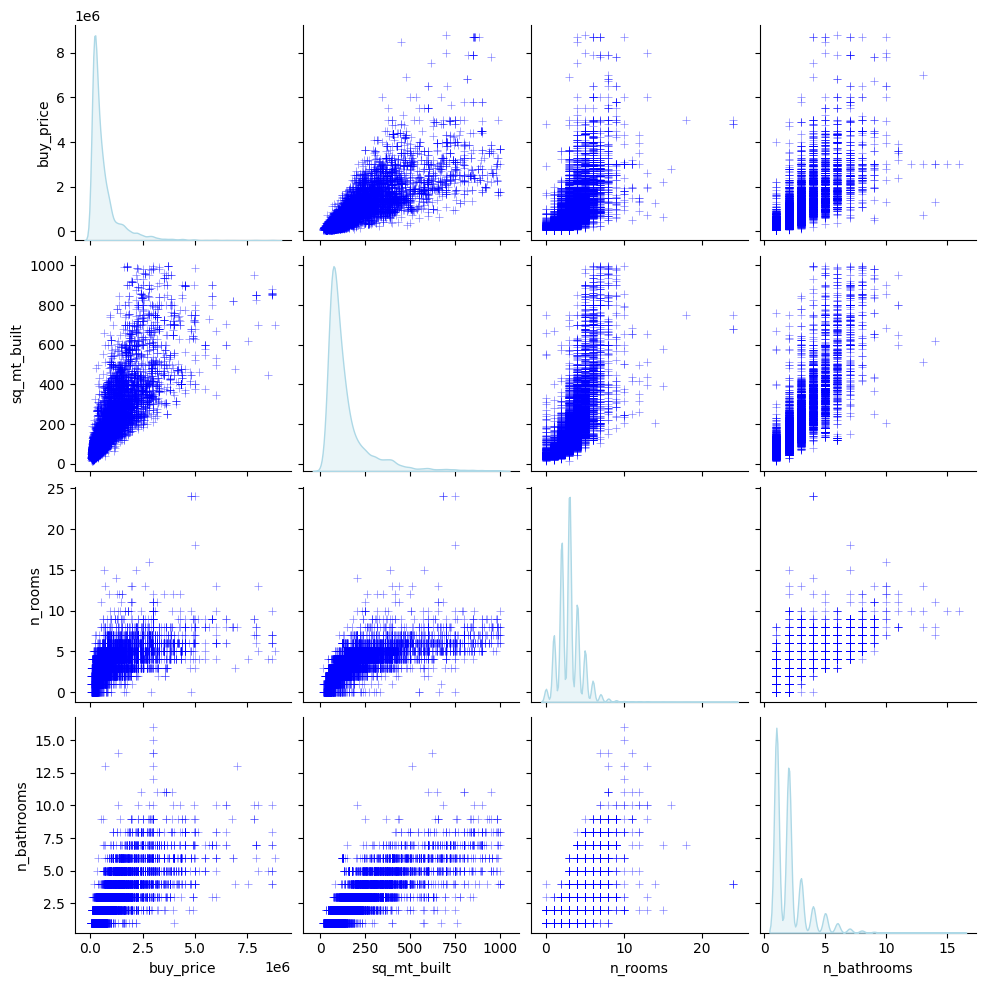

In [7]:
sns.pairplot(df, diag_kind='kde', markers='+',
             plot_kws={'alpha':0.5, 'color':'blue'},
             diag_kws={'shade':True, 'color':'lightblue'})

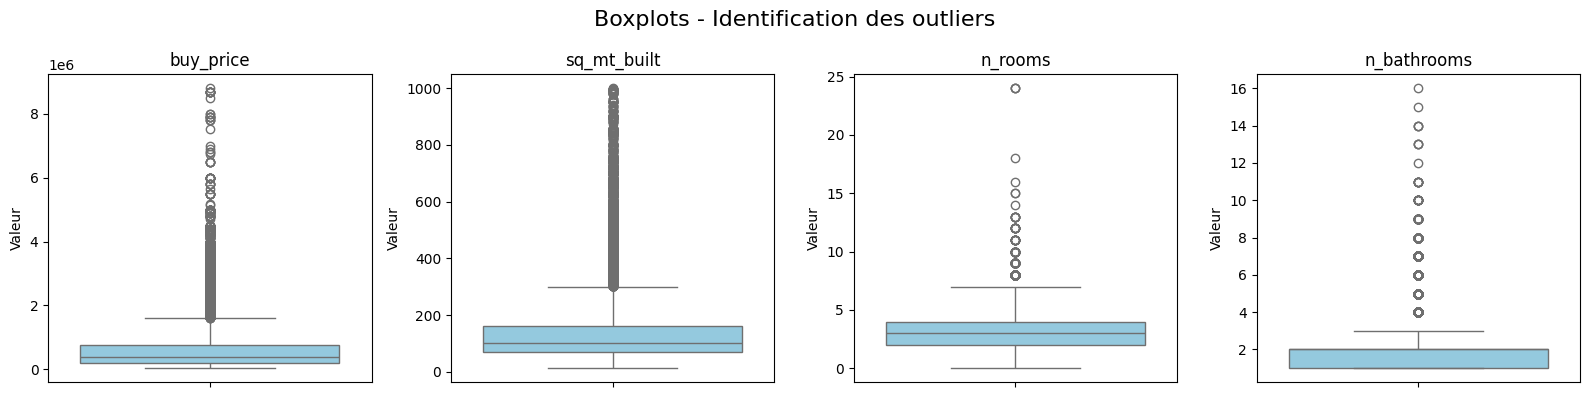

In [8]:
plot_boxplots(df)

In [9]:
df_clean = remove_outliers_iqr(df, logs=True)

📊 Avant : 21742 lignes
✅ Après : 17000 lignes
🗑️  Supprimés : 4742 lignes (21.8%)


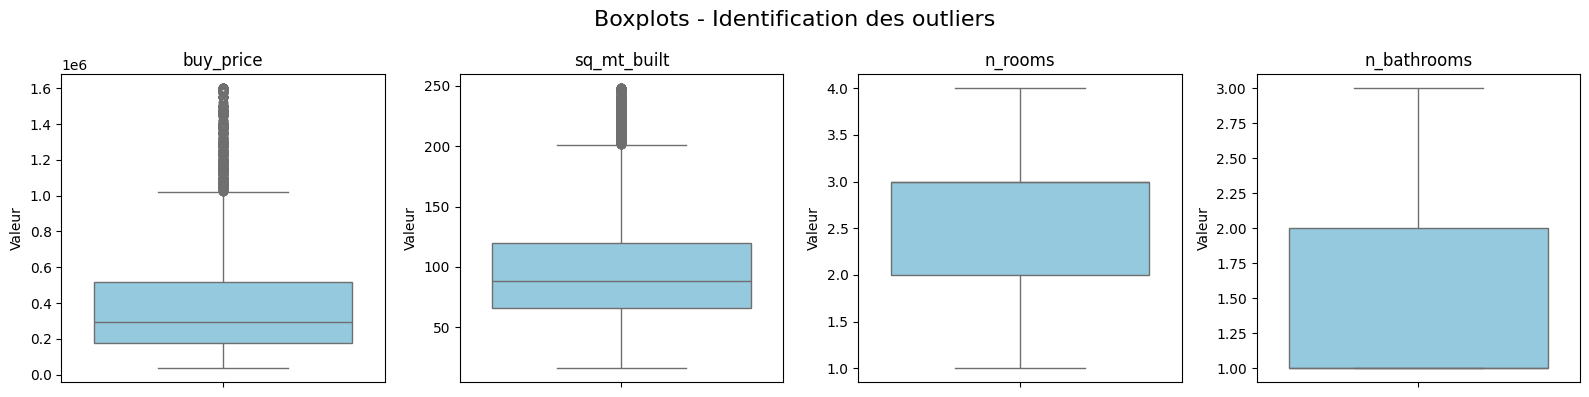

In [10]:
plot_boxplots(df_clean)

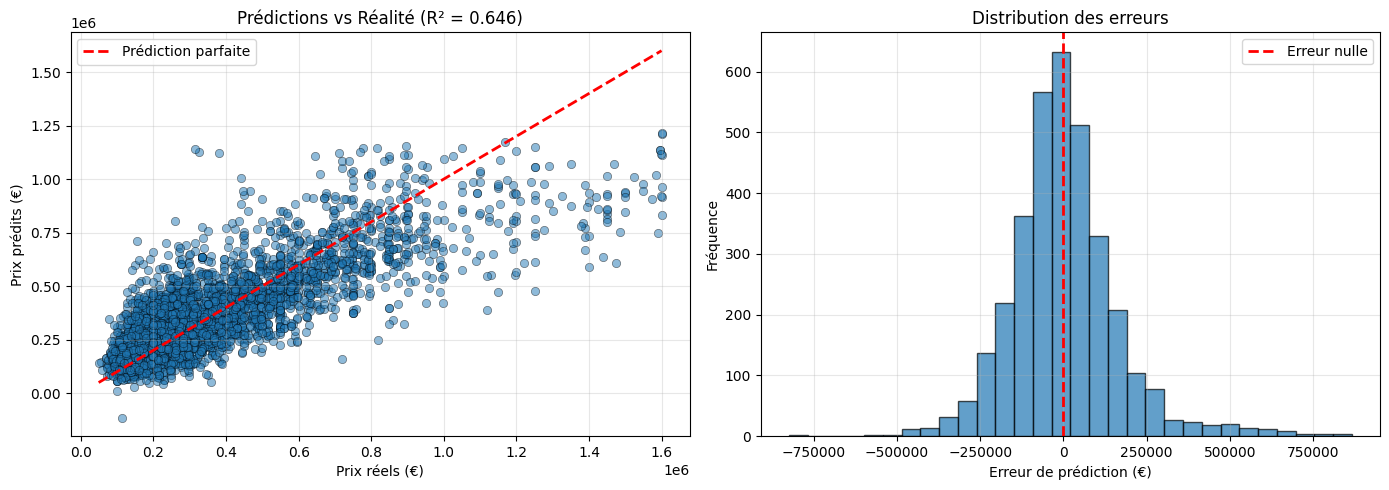

📊 RÉSULTATS D'ENTRAÎNEMENT
Train R² : 0.648
Train MAE : 114,806 €
Train RMSE : 161,208 €

📊 RÉSULTATS DE TEST
Test R² : 0.646
Test MAE : 116,983 €
Test RMSE : 164,296 €

🔄 CROSS-VALIDATION
R² moyen (CV) : 0.439 (+/- 0.373)


In [14]:
pipeline_custom, metrics_custom = train_and_evaluate_model(
    df_clean, 
    LinearRegression(),
    columns_to_scale=['sq_mt_built']
)